In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values

In [2]:
df = pd.read_csv("/Users/matthewmarquez/Desktop/VirtualInternshipAnalysis/data/data.csv", encoding="ISO-8859-1")

In [3]:
df

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19175,19176,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,19177,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2
19177,19178,367,o,19181,PESPVP,"Well, we are out of time for our meeting.",6,Mentor,Reflection team discussion of first batch results,0,0,0,0,0,0,4,9
19178,19179,393,o,19182,PESPVP,Precisely,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,1


In [4]:
df.describe()

,Unnamed: 0,userIDs,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
count,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000
mean,9590.500000,202.433212,9592.793796,3.916736,0.028728,0.102868,0.187018,0.018144,0.052242,0.021064,3.741606,12.489520
std,5536.933417,118.355170,5537.800672,1.397935,0.167045,0.303794,0.389936,0.133475,0.222520,0.143600,1.464839,14.117233
min,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4795.750000,96.000000,4796.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000
50%,9590.500000,204.000000,9593.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000
75%,14385.250000,317.000000,14388.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.000000
max,19180.000000,393.000000,19183.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1032.000000


In [5]:
XX = df[["m_experimental_testing","m_making_design_choices","m_asking_questions","j_customer_consultants_requests","j_performance_parameters_requirements","j_communication","wordCount"]]
Y = df[["OutcomeScore"]]
X = (XX-XX.mean())/XX.std()

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=0) 

In [7]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=21)
x_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [8]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=42)
logisticRegr.fit(x_resampled, y_resampled)
logisticRegr.predict(X_test)

/opt/anaconda3/envs/vi/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([4, 4, 3, ..., 0, 1, 0])

In [9]:
y_pred = logisticRegr.predict_proba(X_test) # calculate the probabilities for the test features
# print out the probability table with a header
print('Probability table for testing set is:')
print(y_pred)

Probability table for testing set is:
[[0.11346344 0.10619429 0.12444795 ... 0.10881935 0.11563216 0.05284625]
 [0.11171156 0.1108125  0.12172296 ... 0.11015133 0.11556514 0.05509355]
 [0.11795907 0.09409587 0.1236576  ... 0.10730573 0.1240693  0.06939273]
 ...
 [0.11815598 0.11231593 0.11285534 ... 0.11046437 0.10661847 0.11121028]
 [0.11493614 0.11920937 0.10870184 ... 0.11201736 0.10606997 0.1178725 ]
 [0.11763257 0.11345525 0.11217075 ... 0.11073998 0.10654444 0.11231245]]


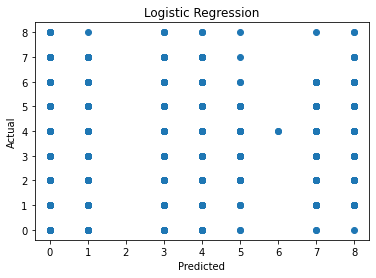

In [10]:
y_pred=logisticRegr.predict(X_test) # calculate the predicted values of the model for the test features
plt.scatter(y_pred,y_test) # plot the predicted values against the actual test values
plt.xlabel('Predicted') # xlabel
plt.ylabel('Actual') # ylabel 
plt.title('Logistic Regression'); # add a title

Logistic Regression Accuracy: 0.14103232533889468


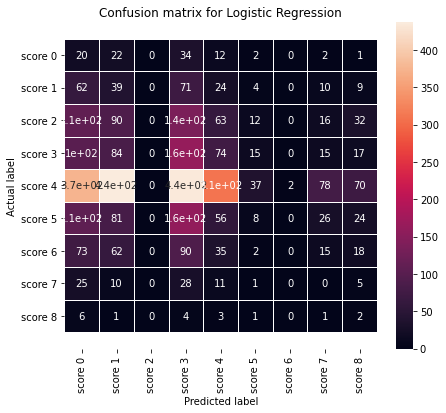

In [11]:
from logitplots import plt_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
plt_confusion_matrix(cm, ["score 0", "score 1","score 2","score 3","score 4","score 5","score 6","score 7","score 8"], 'Logistic Regression') 
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))